<div style=" border-bottom: 8px solid #00B2FF; overflow: hidden; border-radius: 10px; height: 60px; width: 100%; display: flex;">
  <div style="height: 100%; width: 100%; background-color: #3800BB; float: left; text-align: center; display: flex; justify-content: left; align-items: center; font-size: 40px; ">
    <b><span style="color: #FFFFFF; padding: 20px 20px;">CatBoost</span></b>
  </div>
</div>

<div class="alert" style="background-color: #FEDAD5; border-left: 8px solid #B12111; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">
  <h5 style="font-size: 16px; margin-bottom: 10px;">
    <strong> Contents </strong>
  </h5>
<hr>
  <p><font size="3" face="Arial" font-size="large">
  <ul type="square">
      
  <li>CatBoost Classifier and its parameters </li>
  <li>Setup learning by folds</li>
  <li>Best practices using CatBoost</li>
  <li>Useful built-in features (functions)</li>
  <li>Other parameters</li>
  <li>Conclusion</li>
  
  </ul>
  </font></p>

</div>

<div class="alert" style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">

**`CatBoost`** is an open—source package for gradient boosting on decision trees with support for categorical features out of the box, the "successor" to the `MatrixNet` algorithm developed by Yandex.<br>
In terms of ease of use and ease of entry for beginners, it is probably the top 1 package for tabular data, and that's why:
* **Accepts categorical features** immediately without any preprocessing.
* To transfer training from **`CPU`** to **`GPU`**, it is enough to change the value of 1 parameter, without installing an additional packages or special versions, as in other libraries
* Even with default parameters, it provides good model accuracy
  * The main parameters are not constant, but **are selected by the package itself**, depending on the size of the input data.
* Can accept text signs, embeddings, and time signs.
* It is integrated into standard pipelines (for example, `sklearn`) without additional manipulations and wrappers.
* Comes complete with "batteries": `feature_selection`, `object_selection`, `cross_validation`, `grid_search`, etc.
</div>

<div class="alert" style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">

**Of the cons: (almost none)**
* Does not know how to handle missing values (We get rid of them ourselves or fill in the `NaN` before submitting it to the model).
* Not all metrics and losses are available when training using **`GPU`**.
</div>

<div class="alert" style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">

**In general, we recommend that you always start with this package.<br>
The algorithm is approximately as follows:**

1. Downloaded the data
2. Conduct a quick EDA
3. Collect a list of categorical features, feed the data into **`CatBoost`**
4. Look at what the model provides with default features and parameters. (baseline)
5. Submit baseline solution
6. Start setting up validation, **feature engineering**, **model tuning**, etc.

In [16]:
from classes import Paths
import numpy as np
import pandas as pd


pd.set_option("display.float_format", "{:,.2f}".format)
pd.set_option("display.max_columns", None)


paths = Paths()

In [17]:
path = paths.quickstart_train
df = pd.read_csv(path)
print(df.shape)
df.head(10)

(2337, 17)


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,109.99,another_bug,4.74,"12,141,310.41",0.10,180.86,0.02,174,170
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,34.48,electro_bug,4.48,"18,039,092.84",0.00,187.86,12.31,174,174
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,34.93,gear_stick,4.77,"15,883,659.43",0.10,102.38,2.51,174,173
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,32.22,engine_fuel,3.88,"16,518,828.77",0.10,172.79,-5.03,174,170
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,27.51,engine_fuel,4.18,"13,983,174.66",0.10,203.46,-14.26,174,171
5,b12101843B,Skoda Rapid,economy,petrol,2.36,2013,42176,2018,48.99,engine_ignition,4.35,"10,855,890.99",0.10,180.89,-18.22,174,173
6,Q-9368117S,Nissan Qashqai,standart,petrol,5.32,2012,24611,2014,54.72,engine_overheat,4.39,"8,343,280.33",0.10,174.98,12.32,174,167
7,O-2124190y,Tesla Model 3,premium,electro,3.90,2017,116872,2019,50.40,gear_stick,4.71,"9,793,288.03",0.10,95.89,-8.94,174,139
8,h16895544p,Kia Sportage,standart,petrol,3.50,2014,56384,2017,33.59,gear_stick,4.51,"16,444,046.89",0.32,101.80,-1.16,174,170
9,K77009462l,Smart ForFour,economy,petrol,4.56,2013,41309,2018,39.04,gear_stick,4.38,"6,975,742.48",0.10,125.25,3.77,174,173


array([[<Axes: title={'center': 'car_rating'}>,
        <Axes: title={'center': 'year_to_start'}>,
        <Axes: title={'center': 'riders'}>,
        <Axes: title={'center': 'year_to_work'}>,
        <Axes: title={'center': 'target_reg'}>,
        <Axes: title={'center': 'mean_rating'}>],
       [<Axes: title={'center': 'distance_sum'}>,
        <Axes: title={'center': 'rating_min'}>,
        <Axes: title={'center': 'speed_max'}>,
        <Axes: title={'center': 'user_ride_quality_median'}>,
        <Axes: title={'center': 'deviation_normal_count'}>,
        <Axes: title={'center': 'user_uniq'}>]], dtype=object)

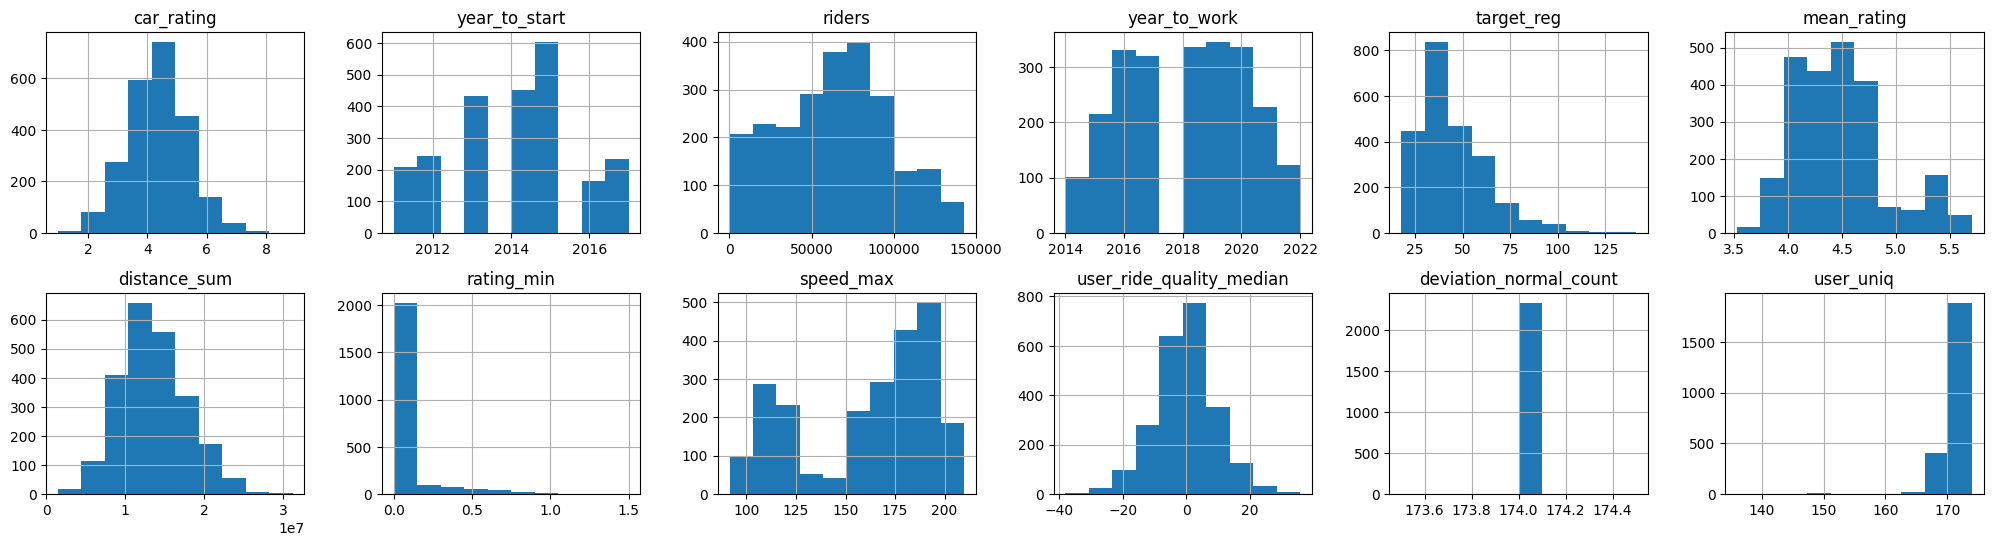

In [18]:
df.hist(figsize=(25, 6), layout=(-1, 6))

<div class="alert alert-warning">

### **Group features and select categorical ones**
</div>

In [19]:
cat_features = ["model", "car_type", "fuel_type"]  # select categorical features
targets = ["target_class", "target_reg"]
features2drop = ["car_id"]  # those features will be dropped

# select final set of features to use in the model
filtered_features = [i for i in df.columns if (i not in targets and i not in features2drop)]
num_features = [i for i in filtered_features if i not in cat_features]

print("cat_features", cat_features)
print("num_features", len(num_features))
print("targets", targets)

for c in cat_features:  # Избавлеямся от NaN'ов
    df[c] = df[c].astype(str)

cat_features ['model', 'car_type', 'fuel_type']
num_features 11
targets ['target_class', 'target_reg']


<div class="alert alert-warning">

### **`CatBoost Classifier` and its parameters**
</div>

<div class="alert" style="background-color: #FEF9E7; border-left: 8px solid #D4AC0D; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">

The task is to use **`CatBoost`** to classify breakdowns. Let's see if the algorithm can handle the task.

Before using it, we will consider the parameters of the model ([read more here](https://catboost.ai/en/docs/references/training-parameters/common)):
</div>

In [20]:
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

In [21]:
CatBoostClassifier?

Init signature:
CatBoostClassifier(
    iterations=None,
    learning_rate=None,
    depth=None,
    l2_leaf_reg=None,
    model_size_reg=None,
    rsm=None,
    loss_function=None,
    border_count=None,
    feature_border_type=None,
    per_float_feature_quantization=None,
    input_borders=None,
    output_borders=None,
    fold_permutation_block=None,
    od_pval=None,
    od_wait=None,
    od_type=None,
    nan_mode=None,
    counter_calc_method=None,
    leaf_estimation_iterations=None,
    leaf_estimation_method=None,
    thread_count=None,
    random_seed=None,
    use_best_model=None,
    best_model_min_trees=None,
    verbose=None,
    silent=None,
    logging_level=None,
    metric_period=None,
    ctr_leaf_count_limit=None,
    store_all_simple_ctr=None,
    max_ctr_complexity=None,
    has_time=None,
    allow_const_label=None,
    target_border=None,
    classes_count=None,
    class_weights=None,
    auto_class_weights=None,
    class_names=None,
    one_hot_max_size=Non

<div class="alert" style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">

**Basic parameters**
    
* `iterations` (synonyms `num_boost_round`, `n_estimators`, `num_trees`) - the maximum number of trees used in the model (default **`1000`**). <br>
    The value may be lower than the set value if other parameters are used that limit the number of trees.;
* `learning_rate` or `eta` is the learning rate, which determines how fast or slow the model will learn. The default value is usually **`0.03`**.
* `depth (max_depth)` - depth of the tree (default is 6, maximum value is 16); 
* `cat_features` - a list of categorical feature names;
</div>

<div class="alert" style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">


**Training mode**

* `loss_function` or `objective` is a loss function that must be minimized during training. There are indicators for regression (RMS error), there are for classification (`logloss`).
* `eval_metric' is a validation metric used to detect overfitting and early shutdown;
* `custom_metric` - tracked metrics. The best metrics in the learning process can be returned using the `get_best_score` method;
* `early_stopping_rounds` - determines the number of iterations before stopping, if during their course the quality metric has not improved compared to the optimal one;
* `use_best_model` - if **`True`**, as a result of early stop training, the model obtained during the iteration (number of trees) with the best metric in the validation sample will be returned;
</div>

<div class="alert" style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">


**Regularization of the model, accelerating and generalizing the model**
    
* `l2_leaf_reg` (or `reg_lambda`) is the coefficient for the regularization term **`L2`** of the loss function. The default value is **`3.0`**.
* `min_data_in_leaf (min_child_samples)` is the minimum number of training samples per leaf. 
* `max_leaves (num_leaves)` - the maximum number of leaves in the tree. 
* `subsample` is a part of the initial sample selected for training each tree;
* `colsample_bylevel` - the proportion of features used for selection on each split;
* `max_bin` - the maximum number of bins into which the features are divided
</div>

<div class="alert" style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">


**Useful to use**    
    
* `random_seed` or `random_state` is the initializing value for the random number generator used to ensure reproducibility of the experiment.;
* `task_type` - the device used for calculations (**`CPU`**, **`GPU`**);
* `thread_count` - the number of threads used for training (default = **`-1`**, which means all processor cores);
* `verbose` - the amount of information displayed (**`False`** - suppressing messages).
</div>

<div class="alert" style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">


**Balancing classes**

* `class_weights` - class weights in classification models. Used to eliminate an imbalance (for example, weight `positive`= `quantity negative`/`quantity positive`);
* `classes_count` - the number of classes for multiclass classification;
* `auto_class_weights` - eliminates the imbalance automatically (values are **`Balanced`**, **`SqrtBalanced`**);
* `scale_pos_weight` - sets the weight for a positive class; Among the parameters `scale_pos_weight`, `auto_class_weights`, `class_weights`, only one is used at a time.
</div>

<div class="alert alert-warning">

### **Train CatBoost with default parameters**
</div>

In [22]:
from sklearn.model_selection import train_test_split

X = df[filtered_features].drop(targets, axis=1, errors="ignore")
y = df["target_class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
clf = CatBoostClassifier(thread_count=-1,
                         random_seed=42,
                         cat_features=cat_features)

clf.fit(
    X_train,
    y_train,
    eval_set=(X_test, y_test),
    verbose=200,
    use_best_model=True,
    plot=False,
    early_stopping_rounds=100,
)

Learning rate set to 0.109335
0:	learn: 1.8108068	test: 1.8310378	best: 1.8310378 (0)	total: 12ms	remaining: 11.9s
200:	learn: 0.2789378	test: 0.5441162	best: 0.5374049 (156)	total: 2.01s	remaining: 8.01s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.5374048663
bestIteration = 156

Shrink model to first 157 iterations.


In [24]:
clf.learning_rate_

0.10933499783277512

<div class="alert" style="background-color: #FEF9E7; border-left: 8px solid #D4AC0D; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">

We see that **`CatBoost`** itself set the parameter `learning_rate = 0.1093` <br>
Now let's change the number of trees.
</div>

In [25]:
clf = CatBoostClassifier(iterations=100,
                         thread_count=-1,
                         random_seed=42,
                         cat_features=cat_features)

clf.fit(
    X_train,
    y_train,
    eval_set=(X_test, y_test),
    verbose=10,
    use_best_model=True,
    early_stopping_rounds=50,
)

Learning rate set to 0.263488
0:	learn: 1.5180267	test: 1.5292177	best: 1.5292177 (0)	total: 5.94ms	remaining: 588ms
10:	learn: 0.5942287	test: 0.6609974	best: 0.6609974 (10)	total: 70.7ms	remaining: 572ms
20:	learn: 0.5086990	test: 0.6046452	best: 0.6046452 (20)	total: 141ms	remaining: 531ms
30:	learn: 0.4489243	test: 0.5761154	best: 0.5761154 (30)	total: 209ms	remaining: 465ms
40:	learn: 0.4020685	test: 0.5688007	best: 0.5684894 (33)	total: 277ms	remaining: 399ms
50:	learn: 0.3600712	test: 0.5740101	best: 0.5681639 (46)	total: 348ms	remaining: 335ms
60:	learn: 0.3375750	test: 0.5737759	best: 0.5681639 (46)	total: 416ms	remaining: 266ms
70:	learn: 0.3129667	test: 0.5697338	best: 0.5678971 (68)	total: 483ms	remaining: 197ms
80:	learn: 0.2922667	test: 0.5678989	best: 0.5657195 (76)	total: 553ms	remaining: 130ms
90:	learn: 0.2685586	test: 0.5679290	best: 0.5657195 (76)	total: 621ms	remaining: 61.5ms
99:	learn: 0.2537216	test: 0.5724496	best: 0.5657195 (76)	total: 681ms	remaining: 0us

be

In [26]:
clf.learning_rate_

0.2634879946708679

<div class="alert" style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">

The number of trees was halved and the `learning_rate` was also recalculated - it became more: `0.26349`. It also depends not only on the number of trees, but is also recalculated to fit the dataset size - this is one of the cool features of CatBoost, and therefore it can produce good accuracy out of the box. To see other hyperparameters of the model and how they change, you can call the method: `clf.get_all_params()`
</div>

In [27]:
clf.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'MultiClass',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=8:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 100,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'od_pval': 0,
 'random_score_type': 'NormalWithModelSizeDecrease',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 1,
 'model_size_reg': 0.5,
 'simple_ctr': 

In [28]:
# let's look at feature importance using built-in method
# do not forget about prettified parameter to get a nice table
clf.get_feature_importance(prettified=True)

,Feature Id,Importances
0,speed_max,34.34
1,mean_rating,34.16
2,rating_min,13.21
3,model,4.21
4,user_uniq,2.79
5,car_type,2.42
6,user_ride_quality_median,2.22
7,distance_sum,2.07
8,riders,1.73
9,year_to_work,1.19


<div class="alert alert-warning">

### **Set training by folds up**
</div>

In [29]:
from catboost import CatBoostClassifier, CatBoostRegressor, Pool
from sklearn.model_selection import KFold  # k-fold cross-validation

In [30]:
n_splits = 3  # Number of folds. Optimal 3, 5 or 10
clfs = [] # will store models here
scores = [] # here we will store validation scores

# validation parameters, training will be done on n_splits folds
X = df[filtered_features].drop(targets, axis=1, errors="ignore")
y = df["target_class"]

kf = KFold(n_splits=n_splits, shuffle=True, random_state=7575)
for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # special class to speed up training
    train_dataset = Pool(data=X_train, label=y_train, cat_features=cat_features)
    eval_dataset = Pool(data=X_test, label=y_test, cat_features=cat_features)

    clf = CatBoostClassifier(
        depth=4,
        iterations=3500,
        learning_rate=0.06,
        loss_function="MultiClass",  # MultiLogloss
        # eval_metric = 'Precision',  F1:macro / AUC:hints=skip_train~false
        custom_metric=["Recall"],  # 'AUC / Accuracy,
        
        # main catboost feature - works with categorical features
        cat_features=cat_features,
        # ignored_features = ignored_features,
        
        # regularization and speed up
        colsample_bylevel=0.098,
        subsample=0.95,
        l2_leaf_reg=9,
        min_data_in_leaf=243,
        max_bin=187,
        random_strength=1,
        
        # speed up parameters
        task_type="CPU",    
        thread_count=-1,
        bootstrap_type="Bernoulli", 
        
        # important parameters
        random_seed=7575,
        auto_class_weights="SqrtBalanced",
        early_stopping_rounds=50)

    clfs.append(clf)

    clf.fit(
        train_dataset,
        eval_set=eval_dataset,
        verbose=500,
        use_best_model=True,
        plot=False)

    scores.append(np.mean([v for k, v in clf.best_score_["validation"].items() if "Recall" in k], dtype="float16"))
    # scores.append(clf.best_score_['validation']['MultiClass'])
    # clf.save_model("../tmp_data/cool_catboost_model_{}_deep".format(n))

assert len(clfs) == n_splits
print("mean Recall score --------->", np.mean(scores, dtype="float16") - np.std(scores, dtype="float16"))

0:	learn: 2.1956073	test: 2.1958090	best: 2.1958090 (0)	total: 801us	remaining: 2.81s
500:	learn: 0.4702692	test: 0.5569354	best: 0.5569354 (500)	total: 432ms	remaining: 2.58s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5096496804
bestIteration = 916

Shrink model to first 917 iterations.
0:	learn: 2.1951404	test: 2.1964014	best: 2.1964014 (0)	total: 698us	remaining: 2.44s
500:	learn: 0.4909194	test: 0.5563577	best: 0.5562080 (497)	total: 434ms	remaining: 2.6s
1000:	learn: 0.3966868	test: 0.5050220	best: 0.5049836 (997)	total: 857ms	remaining: 2.14s
1500:	learn: 0.3424117	test: 0.4915552	best: 0.4912305 (1471)	total: 1.29s	remaining: 1.72s
2000:	learn: 0.3046162	test: 0.4830459	best: 0.4830234 (1990)	total: 1.7s	remaining: 1.27s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.4803302269
bestIteration = 2197

Shrink model to first 2198 iterations.
0:	learn: 2.1956876	test: 2.1960187	best: 2.1960187 (0)	total: 799us	remaining: 2.79s
500:	learn:

<div class="alert" style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">

* `cat_features` — a list with categorical features.
* `ignored_features` — indicates the fetures that should be ignored during the learning process.
* `task_type` – you are using **`CPU`** or **`GPU`**. The default value is **`CPU`**.
* `devices` — **`GPU`** device IDs that will be used for training.
</div>

<div class="alert alert-warning">

### **CatBoost - best setup practices**
</div>

<div class="alert" style="background-color:  #E8F8F5; border-left: 8px solid #1ABC9C; padding: 14px; border-radius: 8px; font-size: 14px; color: #000000;">
    
- Categorical features should be placed in `cat_features`. We don't code ourselves. 
- Fix the `random_seed` of the model and the splits. (Ideally, the order of the features too)
- Put data in the `Pool` to speed up. (quantiles are calculated in advance)
- Have an `eval_set` to set the `early_stopping_rounds`
- Use the regularization parameters `l2_leaf_reg`, `colsample_bylevel`, `subsample` and others
- Set the `max_depth` as low as possible with the same level of accuracy
- `iterations` must be with a margin for `early_stopping_rounds` to be triggered
- `learning_rate` is selected according to the metric.
- The metric is the one that is declared in the championship. (**Recall**, **MAE**, **Correlation** ...)
- We evaluate the model by **`score = mean(metrics) - std(metrics)`**!
- Sometimes we record metric values locally and their value on the leaderboard.
</div>

<div class="alert alert-warning">

### **Model Interpretation and Visualization**
</div>

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns

def plot_importance(df, best_model, height, top_n=50):
    
    fi = pd.DataFrame(index = df.columns, columns = [])
    for i, m in enumerate(best_model):
        fi[f'm_{i}'] = m.get_feature_importance()

    fi = fi.stack().reset_index().iloc[:,[0, 2]]#.to_frame()
    fi.columns = ['feature','importance']

    cols_ord = list(fi.groupby('feature')['importance'].mean().sort_values(ascending=False).index)
    print('{} features in total, averaged by {}models: '.format(len(cols_ord), len(best_model)) )
    cols_ord = cols_ord[:top_n]
    
    fi = fi[fi['feature'].isin(cols_ord)]
    
    plt.figure(figsize=(10, len(cols_ord)*height))
    b = sns.boxplot(data=fi, y='feature', x='importance', orient='h', order=cols_ord)
    
    print('{} features are shown on graph'.format(top_n))
    return fi.groupby(by =['feature'], as_index=False)['importance'].mean().sort_values(by='importance', ascending=False)

# df_feats_imp = plot_importance(train[filtered_features].drop(targets, axis=1, errors='ignore'), clfs, 0.20, top_n=100)


14 features in total, averaged by 3models: 
13 features are shown on graph


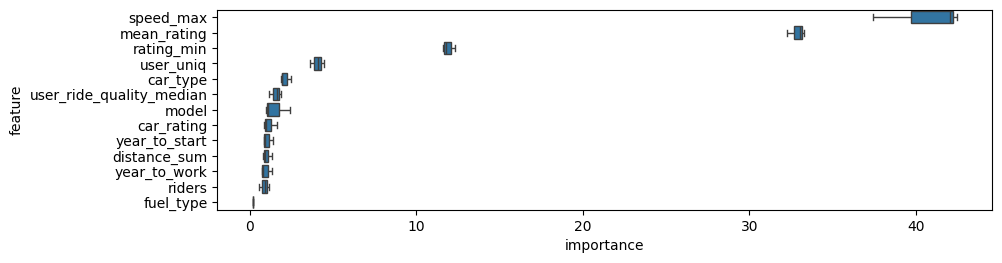

In [32]:
df_feats_imp = plot_importance(
    df[filtered_features].drop(targets, axis=1, errors="ignore"),
    best_model = clfs,
    height = 0.20,
    top_n=13,
)